<a href="https://colab.research.google.com/github/lakepicnic/Section_project/blob/main/Section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal of project

**다음 분기에 어떤 게임을 설계해야할까**

반드시 들어가야 하는 내용
- 지역에 따라서 선호하는 게임 장르가 다를까?
- 연도별 게임의 트렌드가 있을까?
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 함.

In [2]:
# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
# Unnamed: 0 컬럼 제거
df = df.iloc[:,1:]

In [7]:
#결측치 확인
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
df1 = df.copy()

In [9]:
# 결측치 제거
df1.dropna(subset=['Year','Genre','Publisher'], inplace = True)
df1.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [10]:
# 이상 데이터 처리
def year(x):
  if(x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 100):
    return int(1900 + x)
  else:
    return int(x)

df1['Year'] = df1['Year'].apply(year)
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [11]:
# Sales 단위를 같게 해줌
for a in df1.iloc[:,5:]:
    df1[a] = df1[a].apply(lambda x: str(int(x.replace('K',''))*0.001) if x[-1]=='K' else x)
    df1[a] = df1[a].apply(lambda x: x.replace('M','') if x[-1]=='M' else x)
    df1[a] = pd.to_numeric(df1[a])
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [12]:
# 지역에 따라서 선호하는 게임의 장르가 다를까?
df1['Total_Sales'] = df1['NA_Sales']+ df1['EU_Sales']+ df1['JP_Sales']+ df1['Other_Sales']
genre_Total = df1.groupby(['Genre'])['Total_Sales'].sum()
genre_NA = df1.groupby(['Genre'])['NA_Sales'].sum()
genre_EU = df1.groupby(['Genre'])['EU_Sales'].sum()
genre_JP = df1.groupby(['Genre'])['JP_Sales'].sum()
genre_Other = df1.groupby(['Genre'])['Other_Sales'].sum()
genre = pd.DataFrame()
genre = genre.append([genre_NA,genre_EU,genre_JP,genre_Other,genre_Total])
genre = genre.T
genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.48,310.23,38.18,101.86,1024.75


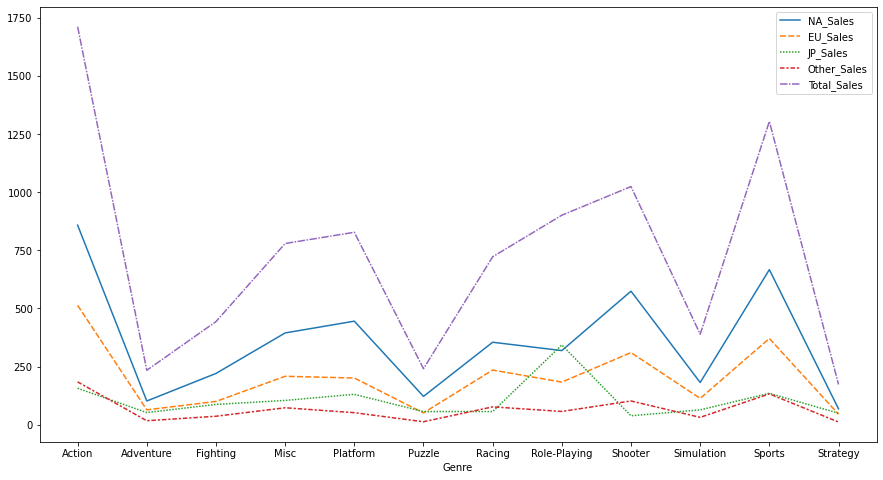

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))
sns.lineplot(data = genre)
#Total의 그래프와 비교해봤을 때 전반적으로 action이 1등, sports가 2등으로 일치하지만.
#일본의 경우 1등이 Role-playing 인 것을 확인할 수 있다. 

In [14]:
#연도별 게임의 트렌드
Year_trend = df1.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index()
Year_trend2 = Year_trend.groupby('Year')['Total_Sales'].transform(max)==Year_trend['Total_Sales']
Year_trend3 = Year_trend[Year_trend2].reset_index(drop=True)
Year_trend3

,Year,Genre,Total_Sales
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


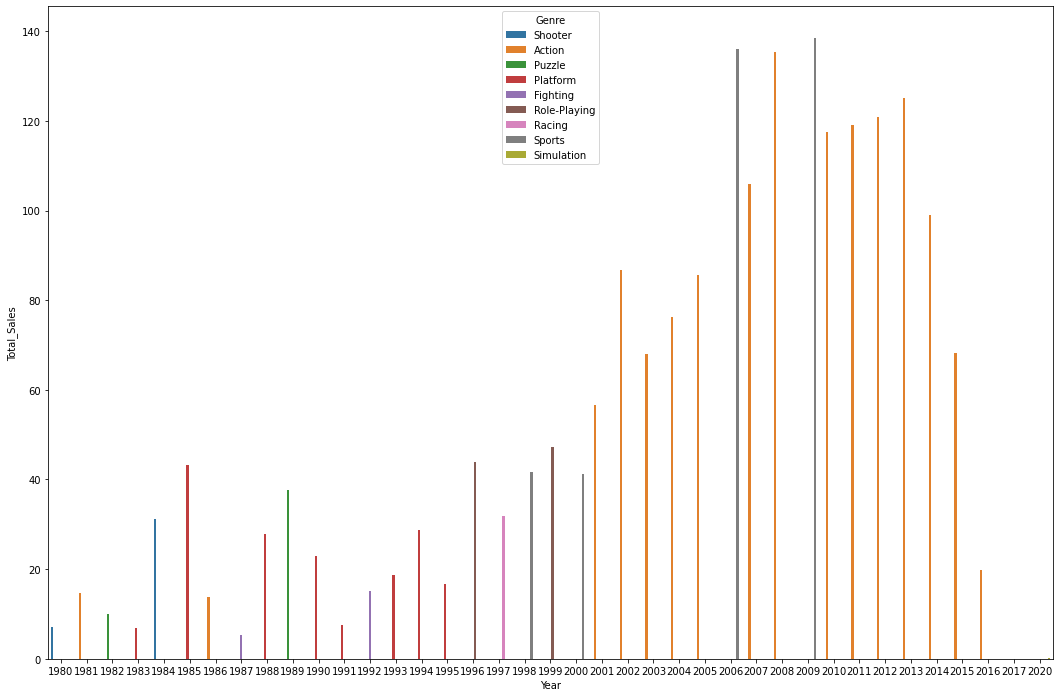

In [15]:
plt.figure(figsize = (18,12))
sns.barplot(x='Year',y = 'Total_Sales',data=Year_trend3, hue = 'Genre')
# 1980~90년대에는 다양한 게임 장르들이 유행했었으나, 2000년대에 들어서는 action과 sports 장르가 유행을 끌고있음을 알 수 있다. 

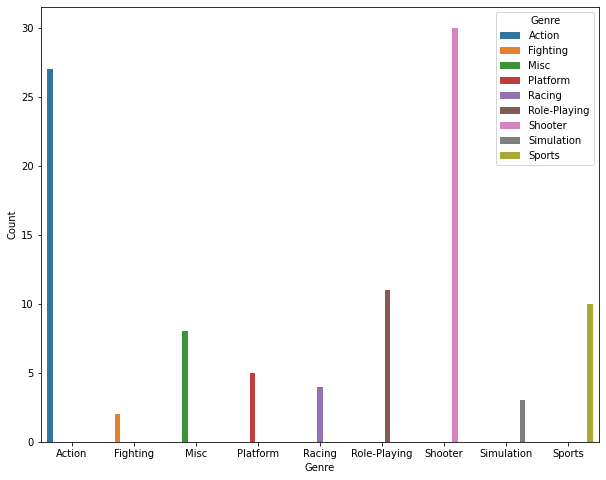

In [16]:
#출고량이 높은 게임에 대한 분석
#최근 10년간 Top 100 Genre 출고량
Sales_100 = df1[df1.Year>2010].sort_values(by='Total_Sales', ascending=False)
Sales_100 = Sales_100.head(100).reset_index(drop=True)
Sales_100_Genre = Sales_100.groupby(['Genre']).size().reset_index(name = "Count")
Sales_100_Genre
plt.figure(figsize = (10,8))
sns.barplot(x='Genre',y = 'Count',data=Sales_100_Genre, hue = 'Genre')

Text(0.5, 1.0, 'NA_Sales Top100 Genre')

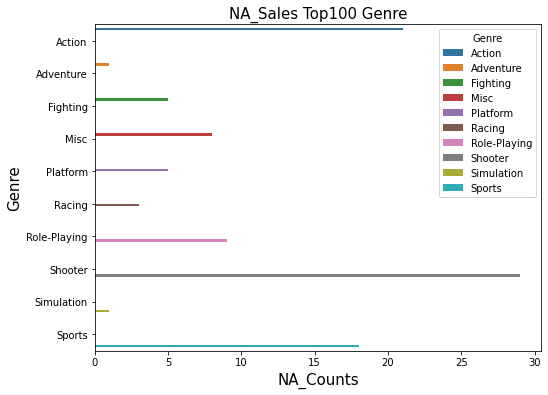

In [17]:
Sales_100_NA = df1[df1.Year>2010].sort_values(by='NA_Sales', ascending=False)
Sales_100_NA = Sales_100_NA.head(100).reset_index(drop=True)
Sales_100_NA = Sales_100_NA.groupby(['Genre']).size().reset_index(name = "Count")
plt.figure(figsize = (8,6))
sns.barplot(x='Count',y = 'Genre',data=Sales_100_NA, hue = 'Genre')
plt.xlabel("NA_Counts",fontsize=15)
plt.ylabel('Genre',fontsize=15)
plt.title("NA_Sales Top100 Genre", fontsize=15)


Text(0.5, 1.0, 'EU_Sales Top100 Genre')

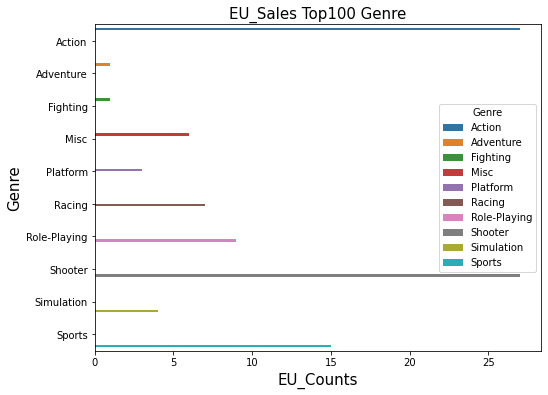

In [18]:
Sales_100_EU = df1[df1.Year>2010].sort_values(by='EU_Sales', ascending=False)
Sales_100_EU = Sales_100_EU.head(100).reset_index(drop=True)
Sales_100_EU = Sales_100_EU.groupby(['Genre']).size().reset_index(name = "Count")
plt.figure(figsize = (8,6))
sns.barplot(x='Count',y = 'Genre',data=Sales_100_EU, hue = 'Genre')
plt.xlabel("EU_Counts",fontsize=15)
plt.ylabel('Genre',fontsize=15)
plt.title("EU_Sales Top100 Genre", fontsize=15)
#둘이 동점임

Text(0.5, 1.0, 'JP_Sales Top100 Genre')

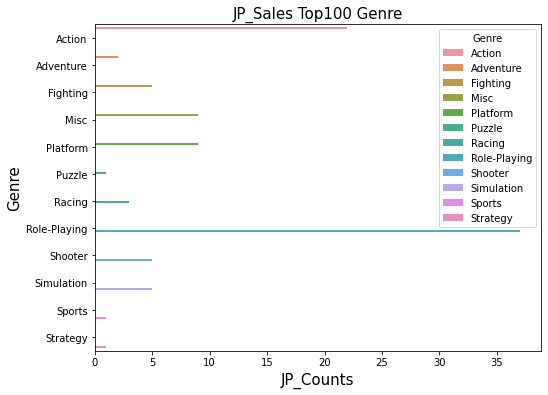

In [19]:
Sales_100_JP = df1[df1.Year>2010].sort_values(by='JP_Sales', ascending=False)
Sales_100_JP = Sales_100_JP.head(100).reset_index(drop=True)
Sales_100_JP = Sales_100_JP.groupby(['Genre']).size().reset_index(name = "Count")
plt.figure(figsize = (8,6))
sns.barplot(x='Count',y = 'Genre',data=Sales_100_JP, hue = 'Genre')
plt.xlabel("JP_Counts",fontsize=15)
plt.ylabel('Genre',fontsize=15)
plt.title("JP_Sales Top100 Genre", fontsize=15)


Text(0.5, 1.0, 'Other_Sales Top100 Genre')

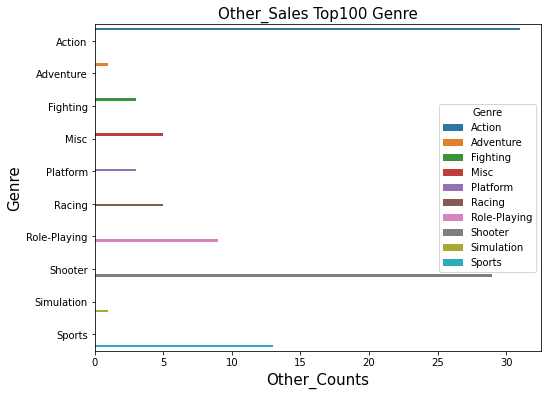

In [21]:
Sales_100_Other = df1[df1.Year>2010].sort_values(by='Other_Sales', ascending=False)
Sales_100_Other = Sales_100_Other.head(100).reset_index(drop=True)
Sales_100_Other = Sales_100_Other.groupby(['Genre']).size().reset_index(name = "Count")
plt.figure(figsize = (8,6))
sns.barplot(x='Count',y = 'Genre',data=Sales_100_Other, hue = 'Genre')
plt.xlabel("Other_Counts",fontsize=15)
plt.ylabel('Genre',fontsize=15)
plt.title("Other_Sales Top100 Genre", fontsize=15)
